<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Hi Rizdha**
    
**Greetings from Fachri**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus yaa.**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Fachri's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Fachri's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>
    
<div class="alert alert-danger">
<b>Fachri's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>
    
<div class="alert alert-info">
<b>Fachri's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>
    
Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini
<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>
</div>

<div  class="alert alert-success">
    
# General feedback v.1 [Project Accepted]

Terima kasih banyak telah mengirimkan proyek Anda! 

Proyek Anda sudah sangat baik dan sudah direvisi, sudah dapat diterima ya, Selamat!
    
Tetap Semangat!
    
<br>
Jika ada sesuatu yang membuat Anda bingung atau tidak mengerti. Tolong, jangan ragu untuk menghubungi tim mentor atau instruktur Anda  yaa
    
</div>

# Deskripsi Proyek

Kita memiliki proyek untuk mengembangkan sebuah model yang mampu memilih paket dengan tepat pada operator seluler Megaline yang merasa tidak puas karena sebagian besar pelanggan mereka masih menggunakan paket lama. Perusahaan tersebut ingin mengembangkan sebuah model yang bisa menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket terbaru Megaline: Smart atau Ultra. Pada proyek ini kita membuat sebuah model dengan tingkat accuracy dengan ambang batas 0,75.

# Daftar Isi

- Memuat Dataset
- Menganalisis Data
- Memisahkan Dataset
- Menguji kualitas Model
    - Decision Tree Classifier
    - Random Forest
    - Logistic Regression
- Kesimpulan

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<div class="alert alert-success">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Sip Good Job</div>

### Memuat dataset

In [2]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

<div class="alert alert-success">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Sip Good Job sudah memisahkan pemuatan dataset dan library</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.sample(10)

,calls,minutes,messages,mb_used,is_ultra
241,5.0,27.01,0.0,2207.27,0
2788,38.0,280.97,41.0,16853.45,0
2627,165.0,965.74,93.0,17477.23,1
2507,36.0,260.94,10.0,15438.40,0
1618,48.0,322.61,73.0,18642.34,1
1847,82.0,492.00,30.0,22325.63,0
3187,35.0,259.10,4.0,14857.57,0
965,81.0,542.22,21.0,15356.16,0
1347,23.0,147.69,30.0,18417.93,0
1132,51.0,381.12,43.0,14771.91,0


In [5]:
df.shape

(3214, 5)

In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


### Mengalisis Data

In [7]:
#check duplikat
df.duplicated().sum()

0

In [8]:
# check for missing values
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [9]:
# fix data type
for col in ['calls', 'messages']:
    df[col] = df[col].apply(np.int64)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB


In [10]:
#Sanity check
df['is_ultra'].value_counts()/len(df['is_ultra']) * 100

0    69.352831
1    30.647169
Name: is_ultra, dtype: float64

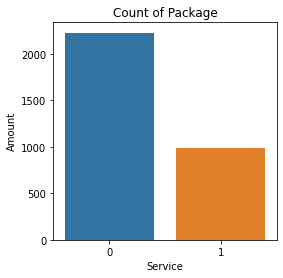

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(x='is_ultra', data=df, order=df['is_ultra'].value_counts().index)
plt.xlabel('Service')
plt.ylabel('Amount')
plt.title('Count of Package')
plt.show()

Berdasarkan analisis data yang dilakukan, tidak terdapat duplikat, dan nilai yang hilang
Type data int diaplikasikan pada kolom 'calls' dan 'messages'
Pengguna Paket smart ('is_ultra = 0) = 69%, untuk memastikan bahwa model kami tidak membuat prediksi yang benar hanya secara kebetulan, kita perlu menetapkan tingkat akurasi ke nilai yang lebih tinggi. Kita akan meningkatkan skor akurasi menjadi 75%.

<div class="alert alert-success">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Sip Good Job</div>

### Memisahkan dataset

Membuat model ML melibatkan tiga langkah: training, validation, and testing. Kami hanya memiliki satu kumpulan data untuk ketiga langkah tersebut, jadi kami perlu membaginya untuk digunakan di setiap tahap.

Training memerlukan lebih banyak data dibandingkan dua tahap terakhir. Membagi dataset dengan rasio 3:1:1 (60% untuk training, masing-masing 20% untuk validation dan testing) seharusnya dapat memberikan data yang cukup untuk setiap bagian. Karena train_test_split hanya dapat membagi kumpulan data menjadi dua, kita perlu menjalankan fungsi ini dua kali.

Kami akan menyetel hyperparameter random_state ke nilai arbitrary 12345 di seluruh proyek. Ini akan memastikan bahwa kami mendapatkan hasil yang konsisten setiap saat.

In [12]:
# membagi dataset menjadi 60% training, 20% validasi dan 20% test

# membagi dataset megaline menjadi 60% untuk training dan 40% untuk (validasi + test)
df_train, df2 = train_test_split(df, train_size=0.6, random_state=12345)

# membagi dataset temporary menjadi 50% untuk validation dan 50% untuk test
df_val, df_test = train_test_split(df2, test_size=0.5, random_state=12345)

In [13]:
# membagi dataset training menjadi fitur dan target
features_train = df_train.drop(['is_ultra'],axis=1)
target_train = df_train['is_ultra']

# membagi dataset validation menjadi fitur dan target
features_val = df_val.drop(['is_ultra'],axis=1)
target_val = df_val['is_ultra']

# membagi dataset test menjadi fitur dan target
features_test = df_test.drop(['is_ultra'],axis=1)
target_test = df_test['is_ultra']

# menampilkan shape dari training dan validation
print('features_train:',features_train.shape)
print('target_train:',target_train.shape,'\n')

print('features_valid:',features_val.shape)
print('target_valid:',target_val.shape,'\n')

print('features_test:',features_test.shape)
print('target_test:',target_test.shape)

features_train: (1928, 4)
target_train: (1928,) 

features_valid: (643, 4)
target_valid: (643,) 

features_test: (643, 4)
target_test: (643,)


<div class="alert alert-success">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Sip Good Job</div>

### Menguji kualitas model

#### Decision Tree Classifier

Performa model ini bervariasi berdasarkan kedalaman pohon. Artinya kita harus menjaga pohonnya cukup dalam untuk menghasilkan hasil terbaik, namun tidak terlalu dalam untuk mencegah overfitting dan pemborosan sumber daya. Untuk mencapai hal ini, kami akan melatih dan memvalidasi model 10 kali dengan kedalaman yang semakin meningkat dan memilih model dengan skor terbaik.

In [14]:
#Mendefinisikan temporary variabel
tree_train_best_score = 0
tree_best_score = 0
tree_best_depth = 0

for depth in range(1, 11):
    # Creating models
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    # Training models
    tree_model.fit(features_train, target_train)
    
    # Getting training scores
    pred_train = tree_model.predict(features_train)
    tree_train_score = accuracy_score(target_train, pred_train)
    
    # Validation and obtaining validation metric scores
    pred_val = tree_model.predict(features_val)
    val_acc_score = accuracy_score(target_val, pred_val)
    
    # Storing the best depth and scores
    if val_acc_score > tree_best_score:
        tree_train_best_score = tree_train_score
        tree_best_score = val_acc_score
        tree_best_depth = depth
    
print('Best depth:', tree_best_depth, 'training accuracy:', tree_train_best_score, 'validation accuracy:', tree_best_score)

Best depth: 3 training accuracy: 0.8075726141078838 validation accuracy: 0.7853810264385692


Model dengan validation accuracy terbaik pada depth : 3, dengan nilai 78.5%
Skor ini telah melampai minimal skor akurasi kita di 75%. Kami akan menggunakan kedalaman ini sebagai hyperparameter untuk model Decision Tree ini

<div class="alert alert-success">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Sip Good Job</div>

#### Random Forest

Pada teknik random forest, keakuratan model akan bervariasi berdasarkan kedalaman maksimal pohonnya (max_depth) dan jumlah pohonnya (n_estimator). max_ depth akan disetel dari 1--10 dan n_estimators akan berkisar dari 1--50 dengan penambahan 2 estimator di setiap iterasi.

In [15]:
#Mendefinisikan temporary variabel
forest_best_training_score = 0
forest_best_score = 0
forest_best_model = None

for depth in range(1, 11):
    for estimator in range(1, 51, 2): # Setting untuk penambahan 2 estimator di setiap iterasi
        
        # Creating & training the model with different max_depth and n_estimators
        forest_model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator)
        forest_model.fit(features_train, target_train)
        
        # Getting training scores
        pred_train = forest_model.predict(features_train)
        forest_train_score = accuracy_score(target_train, pred_train)
        
        # Validating the model
        pred_val = forest_model.predict(features_val)
        val_acc_score = accuracy_score(target_val, pred_val)
        
        # Storing the best score and model
        if val_acc_score > forest_best_score:
            forest_best_training_score = forest_train_score
            forest_best_score = val_acc_score
            forest_best_model = forest_model
                 
print('Best training accuracy:', forest_best_training_score)
print('Best validation accuracy:', forest_best_score)
forest_best_model

Best training accuracy: 0.8744813278008299
Best validation accuracy: 0.807153965785381


RandomForestClassifier(max_depth=8, n_estimators=41, random_state=12345)

Berdasarkan model pohon ini, kedalam terbaik = 8, dan estimator = 41, untuk mendapat Best validation accuracy = 80.7%

<div class="alert alert-success">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Sip Good Job</div>

#### Logistic Regression

Pada metode logistic regression kita akan menguji 5 solver yang telah disediakan oleh scikit-learn ('liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga') namun untuk solver 'sag', dan 'saga' memerlukan iterasi yang lebih banyak. Oleh sebab itu kami akan membuat max_iter hyperparamter menjadi 4000 untuk kedua solver tersebut, dan solver lainnya tetap menggunakan nilai deafultnya 100

In [16]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for solver in solver_list:
    # Creating & training logistic regression models, changing max_iter
    if solver == 'sag' or solver == 'saga':
        logreg_model = LogisticRegression(random_state=12345, solver=solver, max_iter=4000)
    else:
        logreg_model = LogisticRegression(random_state=12345, solver=solver)
    logreg_model.fit(features_train, target_train)
    
    # Getting training accuracy scores
    pred_train = logreg_model.predict(features_train)
    train_acc_score = accuracy_score(target_train, pred_train)
    print(solver, 'training accuracy:', train_acc_score)

    # Validating model & getting accuracy
    pred_val = logreg_model.predict(features_val)
    val_acc_score = accuracy_score(target_val, pred_val)
    print(solver, 'validation accuracy:', val_acc_score)
    print()

liblinear training accuracy: 0.7505186721991701
liblinear validation accuracy: 0.7589424572317263

newton-cg training accuracy: 0.7531120331950207
newton-cg validation accuracy: 0.7558320373250389

lbfgs training accuracy: 0.7131742738589212
lbfgs validation accuracy: 0.7107309486780715



/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


sag training accuracy: 0.7105809128630706
sag validation accuracy: 0.7076205287713841

saga training accuracy: 0.7085062240663901
saga validation accuracy: 0.7076205287713841



Hasil yang kita dapat dengan menggunakan metode logistic regression dengan semua solver kita berada pada rentang akurasi 70%-75%, namun untuk solver liblinear dan newton-cg mengindikasikan underfitting karena validation accuracy lebih tinggi dari training score

<div class="alert alert-success">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Sip Good Job</div>

### Kesimpulan

Diawal kita melakukan sanity check data manual antara data 'is_ultra' 0=69% dan 1=31%, yang mengharuskan model memiliki akurasi lebih dari 75%, dengan menggunakan :

DecisionTreeClassifier dengan tuning hyperparameter random_state=12345, pada depth : 3 
menghasilkan model yang tidak underfitting maupun overfitting dengan tingkat akurasi pada test sebesar 78.5%

RandomForestClassifier dengan tuning hyperparameter random_state=12345, kedalam terbaik = 8, dan estimator = 41, menghasilkan model yang tidak underfitting maupun ovefitting dengan tingkat akurasi pada test sebesar 80.7%

Logistic Regression dengan tuning random_state=12345, solver='liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga', menghasilkan berbagai hasil tingkat akurasi dengan range 70%-75% dan pada solver liblinear dan newton-cg mengindikasikan underfitting

dari ketiga model di atas, RandomForestClassifier memiliki tingkat akurasi tertinggi, tetapi jika dibandingkan kecepatan eksekusi program sedikit lebih lambat dari model yang lain

<div class="alert alert-success">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Sip Good Job</div>